In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss

In [291]:
def plot_exercise_calories_burned_hist(e_df):
    """
    Generates a histogram showing the distribution of calories burned per session of gym members
    """
    plt.figure(dpi=144)

    #Creates Histogram of calories burned distribution
    plt.hist(e_df["Calories_Burned"], bins = 30, color = "skyblue", edgecolor = "black")

    # Calculate statistics
    mean_calories = e_df["Calories_Burned"].mean()
    std_deviation = e_df["Calories_Burned"].std()
    kurtosis = e_df["Calories_Burned"].kurtosis()
    skewness = e_df["Calories_Burned"].skew()

   # Annotate mean (μ) in the top left
    plt.text(0.05, 0.95, f'$\mu$: {mean_calories:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='left', fontsize=10, color='black')

    # Annotate standard deviation (σ) in the top left
    plt.text(0.05, 0.90, f'$\sigma$: {std_deviation:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='left', fontsize=10, color='black')

    #  Annotate kurtosis in the top left
    plt.text(0.05, 0.85, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', color='black')

    # Annotate skewness in the top left
    plt.text(0.05, 0.80, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', color='black')

    #Adds the title and x, y labels
    plt.title('Distribution of Calories Burned During Workouts')
    plt.xlabel('Calories Burned')
    plt.ylabel('Number of Gym Members')

    plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_q/r7xlcst50v1b51ntr79cvyc80000gn/T/ipykernel_46213/448387015.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu$: {mean_calories:.2f}', transform=plt.gca().transAxes,
/var/folders/_q/r7xlcst50v1b51ntr79cvyc80000gn/T/ipykernel_46213/448387015.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.90, f'$\sigma$: {std_deviation:.2f}', transform=plt.gca().transAxes,


In [283]:
def plot_session_duration_vs_calories_burned_scatter(e_df):
    """
    Generates a scatter plot showcasing the association between session duration and calories burned
    """
    plt.figure(dpi=144)

    #Create scatterplot with of session duration vs calories burned with different workout types being shown
    sns.scatterplot(data=e_df, x='Session_Duration (hours)', y='Calories_Burned', 
                 alpha=0.6, hue='Workout_Type', style='Workout_Type', palette='Set2', markers=True)

    #Find the correlation coefficient of session duration vs calories burned
    correlation = e_df['Session_Duration (hours)'].corr(e_df['Calories_Burned'])

    #Add the annotation showing correlation coefficient
    plt.text(0.95, 0.95, f'(r): {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', 
             horizontalalignment='right', verticalalignment='top')
    
    #Add the best fit line
    sns.regplot(data=e_df, x='Session_Duration (hours)', y='Calories_Burned', scatter=False, color='red', line_kws={"label": "Best Fit Line"})

    # Add titles and labels
    plt.title('Scatter Plot of Session Duration vs. Calories Burned')
    plt.xlabel('Session Duration (hours)')
    plt.ylabel('Calories Burned')
    plt.legend(title='Workout Type')
    
    plt.show()

In [284]:
def plot_bf_percentage_workout_type_box_plot_combined(e_df):
    """
    Generates a box plot showing the body fat percentage for each workout type,
    with male and female data displayed side by side.
    """
    plt.figure(dpi=144)
    
    # Create a box plot with both genders
    sns.boxplot(x='Workout_Type', y='Fat_Percentage', hue='Gender', data=e_df, palette='Set1')
    
    # Add titles, labels and format legend
    plt.title('Body Fat Percentage by Workout Type (Males and Females)')
    plt.xlabel('Workout Type')
    plt.ylabel('Body Fat Percentage')
    plt.xticks()
    handles = [plt.Line2D([0], [0], color='red', lw=4), plt.Line2D([0], [0], color='blue', lw=4)]
    plt.legend(handles, ['Males', 'Females'], loc='upper left', prop={'size': 6})

    plt.show()

In [84]:
#Read .csv and convert to dataframe
exercise_df = pd.read_csv("gym_members_exercise_tracking.csv")

In [287]:
#Find column headers and datatypes of those columns
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [86]:
#Find the mean, std, median of each numeric column
exercise_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [286]:
#Create a dataframe containing only the numeric columns
numeric_exercise_df = exercise_df.select_dtypes(include=['float64', 'int64'])

#Create the correlation matrix to see which numeric variables have an association with each other
correlation_matrix = numeric_exercise_df.corr()

print(correlation_matrix)

                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.036340   -0.027837 -0.017073   
Weight (kg)                   -0.036340     1.000000    0.365321  0.057061   
Height (m)                    -0.027837     0.365321    1.000000 -0.017660   
Max_BPM                       -0.017073     0.057061   -0.017660  1.000000   
Avg_BPM                        0.035969     0.009717   -0.014776 -0.039751   
Resting_BPM                    0.004354    -0.032138   -0.005090  0.036647   
Session_Duration (hours)      -0.019912    -0.013666   -0.010206  0.010051   
Calories_Burned               -0.154679     0.095443    0.086348  0.002090   
Fat_Percentage                 0.002370    -0.225512   -0.235521 -0.009056   
Water_Intake (liters)          0.041528     0.394276    0.393533  0.031621   
Workout_Frequency (days/week)  0.008055    -0.011769   -0.011270 -0.029099   
Experience_Level              -0.018676     0.003379   -0.010267

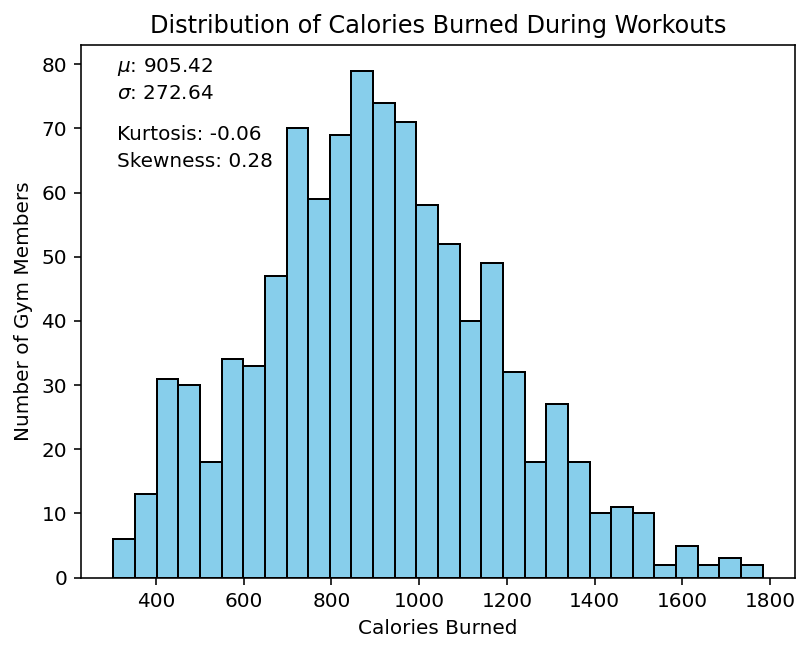

In [292]:
plot_exercise_calories_burned_hist(exercise_df)

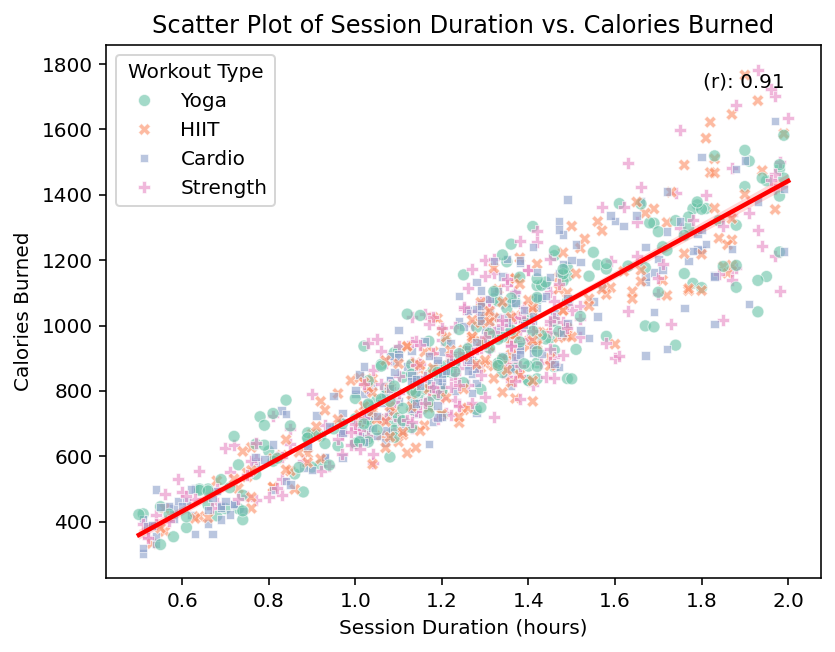

In [267]:
plot_session_duration_vs_calories_burned_scatter(exercise_df)

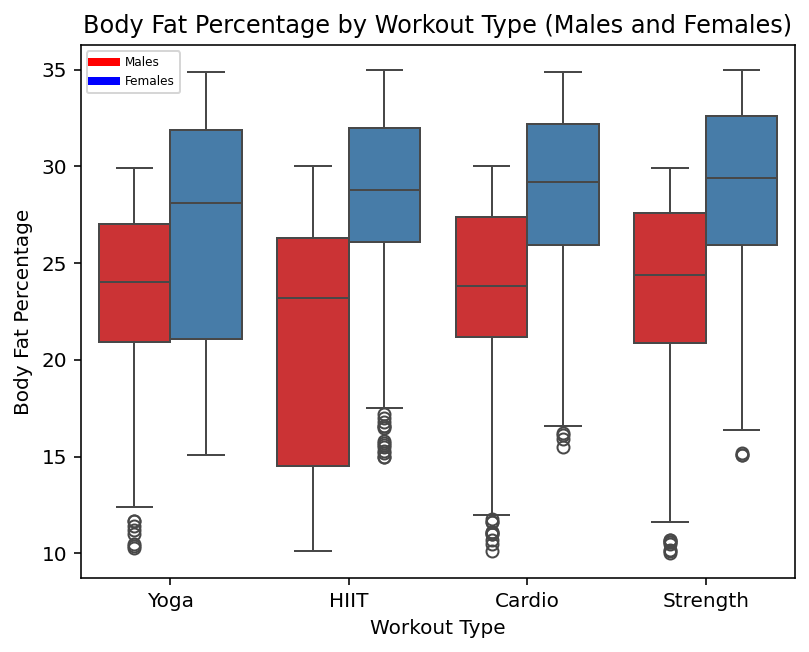

In [272]:
plot_bf_percentage_workout_type_box_plot_combined(exercise_df)

In [288]:
# Group by workout type and calculate statistics
stats_by_group = exercise_df.groupby(['Workout_Type', 'Gender'])['Fat_Percentage'].describe()

print(stats_by_group)

                     count       mean       std   min     25%   50%     75%  \
Workout_Type Gender                                                           
Cardio       Female  126.0  27.938889  5.465367  15.5  25.925  29.2  32.200   
             Male    129.0  22.915504  5.561790  10.1  21.200  23.8  27.400   
HIIT         Female  107.0  27.585981  5.749248  15.0  26.100  28.8  32.000   
             Male    114.0  21.528070  6.111914  10.1  14.525  23.2  26.275   
Strength     Female  123.0  28.143089  5.649940  15.1  25.950  29.4  32.600   
             Male    135.0  23.014074  5.683954  10.0  20.850  24.4  27.600   
Yoga         Female  106.0  26.828302  5.997440  15.1  21.100  28.1  31.900   
             Male    133.0  22.615038  5.551638  10.3  20.900  24.0  27.000   

                      max  
Workout_Type Gender        
Cardio       Female  34.9  
             Male    30.0  
HIIT         Female  35.0  
             Male    30.0  
Strength     Female  35.0  
             